In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
import glob
from pathlib import Path
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

DOWNLOAD_DIR = 'C:\\Users\\P\\Documents\\GitHub\\entsoe-data'

This will import the data, you have to run it to be able to solve the homework.

In [4]:
def read_single_csv_entso_e(file):
    return pd.read_csv(file, sep='\t', encoding='utf-16', parse_dates=["DateTime"])


def load_complete_entso_e_data(directory):
    pattern = Path(directory) / '*.csv'
    files = glob.glob(str(pattern))

    if not files:
        raise ValueError(f"No files found when searching in {pattern}, wrong directory?")
    
    print(f'Concatenating {len(files)} csv files...')

    each_csv_file = [read_single_csv_entso_e(file) for file in files]
    data = pd.concat(each_csv_file, ignore_index=True)

    data = data.sort_values(by=["AreaName", "DateTime"])
    data = data.set_index("DateTime")

    print("Loading done.")

    return data


power_demand = load_complete_entso_e_data(DOWNLOAD_DIR)

Concatenating 68 csv files...
Loading done.


# Exercise 1 - Calculate the relation of Wednesday average consumption to Sunday average consumption for selected countries

In this exercise, calculate the relation of Wednesday average consumption to Sunday average consumption for the following countries: Austria, Germany, United Kingdom, Spain, Sweden, Italy, Croatia.

(1) First create a variable that contains only power consumption data for these countries. The pandas command ```isin()``` may be very helpful here. Reduce the data to only consider the period 2015-01-01 until 2019-12-31. The lecture slides may contain relevant code here.

(2) Then, group the data by weekday and country (i.e. AreaName). Use ```groupby``` and ```mean```for that purpose. 

(3) Calculate for all countries the proportion of Wednesday (day 2) and Sunday (day 6) by dividing the two values.

(4) For which country, this relative value is highest? What could this indicate?

In [5]:
c = ['Austria','Germany','United Kingdom','Spain','Italy','Sweden','Croatia']

In [6]:
pd_countries = power_demand[power_demand['AreaName'].isin(c)]

In [7]:
pd_countries

,Year,Month,Day,ResolutionCode,areacode,AreaTypeCode,AreaName,MapCode,TotalLoadValue,UpdateTime
DateTime,,,,,,,,,,
2014-12-01 23:00:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6493.6,2017-09-14 04:00:06
2014-12-01 23:15:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6350.4,2017-09-14 04:00:06
2014-12-01 23:30:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6494.0,2017-09-14 04:00:06
2014-12-01 23:45:00,2014,12,1,PT15M,10YAT-APG------L,CTY,Austria,AT,6463.2,2017-09-14 04:00:06
2014-12-02 00:00:00,2014,12,2,PT15M,10YAT-APG------L,CTY,Austria,AT,6423.2,2017-09-14 04:00:06
...,...,...,...,...,...,...,...,...,...,...
2020-05-11 22:30:00,2020,5,11,PT30M,GB,CTY,United Kingdom,GB,27496.0,2020-05-13 00:34:29
2020-05-11 23:00:00,2020,5,11,PT30M,GB,CTY,United Kingdom,GB,26155.0,2020-05-13 01:35:15
2020-05-11 23:30:00,2020,5,11,PT30M,GB,CTY,United Kingdom,GB,25325.0,2020-05-13 01:35:15


In [8]:
powerd = pd_countries['2015-01-01':'2019-12-31']

In [9]:
pd_weekday_mean = powerd.groupby([powerd.index.weekday,powerd.AreaName]).mean()

In [10]:
x = pd_weekday_mean.loc[((2,6),),'TotalLoadValue']
x

DateTime  AreaName      
2         Austria            7597.097115
          Croatia            2072.242308
          Germany           59894.796293
          Italy             35925.647596
          Spain             30108.756696
          Sweden            16188.529006
          United Kingdom    37681.473124
6         Austria            5982.295785
          Croatia            1802.134738
          Germany           46127.261956
          Italy             26104.259419
          Spain             24857.647031
          Sweden            14489.429647
          United Kingdom    33251.563333
Name: TotalLoadValue, dtype: float64

In [11]:
proportion = x[2]/x[6]
print(proportion)
proportion.idxmax(axis=0)

AreaName
Austria           1.269930
Croatia           1.149882
Germany           1.298468
Italy             1.376237
Spain             1.211247
Sweden            1.117265
United Kingdom    1.133224
Name: TotalLoadValue, dtype: float64


'Italy'

in Italy on Sundays the consumption in aspect to a weekday differs more than in other countries like Sweden

In [ ]:
#additional approach, based on this mostly. Same code with different names are in a big box, the relevant things separately:

In [12]:
relevant_countrys = ["Austria", "Germany", "United Kingdom", "Spain", "Sweden", "Italy", "Croatia"]
power_demand_relevant_countrys = power_demand[power_demand["AreaName"].isin(relevant_countrys)]
power_demand_relevant_countrys_time_period = power_demand_relevant_countrys["2015-01-01" : "2019-12-31"]
power_demand_relevant_countrys_weekday_mean = power_demand_relevant_countrys_time_period.groupby([power_demand_relevant_countrys_time_period.index.weekday, power_demand_relevant_countrys_time_period.AreaName]).mean()
wednesday_sunday_means = power_demand_relevant_countrys_weekday_mean.loc[((2,6),),'TotalLoadValue']
proportion_wednesday_sunday = ((power_demand_relevant_countrys_weekday_mean.loc[((2),),'TotalLoadValue']) / (power_demand_relevant_countrys_weekday_mean.loc[((6),),'TotalLoadValue']))
highest_proportion = proportion_wednesday_sunday.idxmax(axis=0), proportion_wednesday_sunday.max(axis=0)

In [13]:
highest_proportion = proportion_wednesday_sunday.idxmax(axis=0), proportion_wednesday_sunday.max(axis=0)
highest_proportion

('Italy', 1.3762369971752841)

# Exercise 2 - Calculate the monthly average consumption as deviation from mean consumption

For the same countries as in the above dataset, calculate the monthly mean consumption as deviation from the mean of consumption over the whole time. Plot the curves for all countries.

(1) First create a variable that contains only power consumption data for the selected countries. The pandas command ```isin()``` may be very helpful here. If you did Exercise 1, you can use the same dataset.

(2) Then, aggregate the data by country (i.e. AreaName) and month. Use ```groupby``` and ```mean``` for that purpose. Select the column ```TotalLoadValue``` from the result.

(3)  Aggregate the data by country (i..e AreaName) only, i.e. calculate the average consumption by country using ```groupby``` and ```mean```. Select the column ```TotalLoadValue``` from the result.

(4) Divide the result of (2) by (3) and observe how well broadcasting works here.

(5) Use the command ```unstack``` on the result. How does the table look now? Plot the result. If your resulting, unstacked dataframe is called ```result```, you may use ```result.plot()``` to get a nice plot.

(6) How would you explain the difference in the curve between Croatia and Sweden?


In [14]:
pd_month_mean = powerd.groupby([powerd.index.month,powerd.AreaName]).mean()
pd_month_mean['TotalLoadValue']

DateTime  AreaName      
1         Austria            7932.530645
          Croatia            2169.616129
          Germany           59465.218593
          Italy             34078.574731
          Spain             30520.369202
                                ...     
12        Germany           56849.113073
          Italy             32592.034140
          Spain             28642.714516
          Sweden            18057.871460
          United Kingdom    38694.120942
Name: TotalLoadValue, Length: 84, dtype: float64

In [15]:
pd_month_mean_total = powerd.groupby([powerd.AreaName]).mean()
pd_month_mean_total['TotalLoadValue']

AreaName
Austria            7124.438760
Croatia            2003.858225
Germany           55859.257807
Italy             33192.450073
Spain             28664.970677
Sweden            15623.217001
United Kingdom    36318.162173
Name: TotalLoadValue, dtype: float64

In [16]:
result = pd_month_mean['TotalLoadValue']/pd_month_mean_total['TotalLoadValue']

In [17]:
result.unstack(level=0)

DateTime,1,2,3,4,5,6,7,8,9,10,11,12
AreaName,,,,,,,,,,,,
Austria,1.113425,1.128539,1.063218,0.953912,0.910074,0.926077,0.916214,0.905685,0.942456,0.987381,1.075567,1.085772
Croatia,1.082719,1.063903,1.001216,0.918810,0.905044,0.958456,1.064057,1.052261,0.957277,0.935913,0.991125,1.069385
Germany,1.064554,1.074510,1.036265,0.966114,0.948962,0.963211,0.965244,0.947354,0.965235,0.995737,1.060383,1.017721
Italy,1.026697,1.049985,0.990605,0.910626,0.933483,1.026133,1.136398,0.959686,1.012885,0.970708,1.003899,0.981911
Spain,1.064727,1.066895,1.001202,0.941515,0.935340,0.995052,1.062301,1.009465,0.983747,0.942679,1.001410,0.999224
Sweden,1.274837,1.240632,1.139172,0.995361,0.875668,0.820553,0.757850,0.803023,0.865870,0.974757,1.113573,1.155836
United Kingdom,1.133772,1.158053,1.094719,0.996545,0.948103,0.915583,0.910248,0.896155,0.919244,0.981311,1.082944,1.065421


In [18]:
result.unstack(level=-1)

AreaName,Austria,Croatia,Germany,Italy,Spain,Sweden,United Kingdom
DateTime,,,,,,,
1,1.113425,1.082719,1.064554,1.026697,1.064727,1.274837,1.133772
2,1.128539,1.063903,1.074510,1.049985,1.066895,1.240632,1.158053
3,1.063218,1.001216,1.036265,0.990605,1.001202,1.139172,1.094719
4,0.953912,0.918810,0.966114,0.910626,0.941515,0.995361,0.996545
5,0.910074,0.905044,0.948962,0.933483,0.935340,0.875668,0.948103
6,0.926077,0.958456,0.963211,1.026133,0.995052,0.820553,0.915583
7,0.916214,1.064057,0.965244,1.136398,1.062301,0.757850,0.910248
8,0.905685,1.052261,0.947354,0.959686,1.009465,0.803023,0.896155
9,0.942456,0.957277,0.965235,1.012885,0.983747,0.865870,0.919244


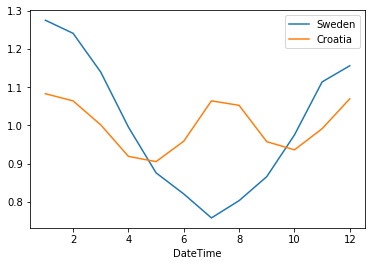

In [19]:
result.unstack(level=0).loc[('Sweden')].plot(legend=True)
result.unstack(level=0).loc[('Croatia')].plot(legend=True)

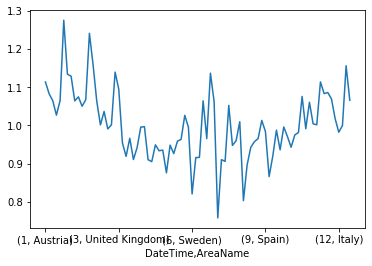

In [20]:
result.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015400164988>,
      dtype=object)

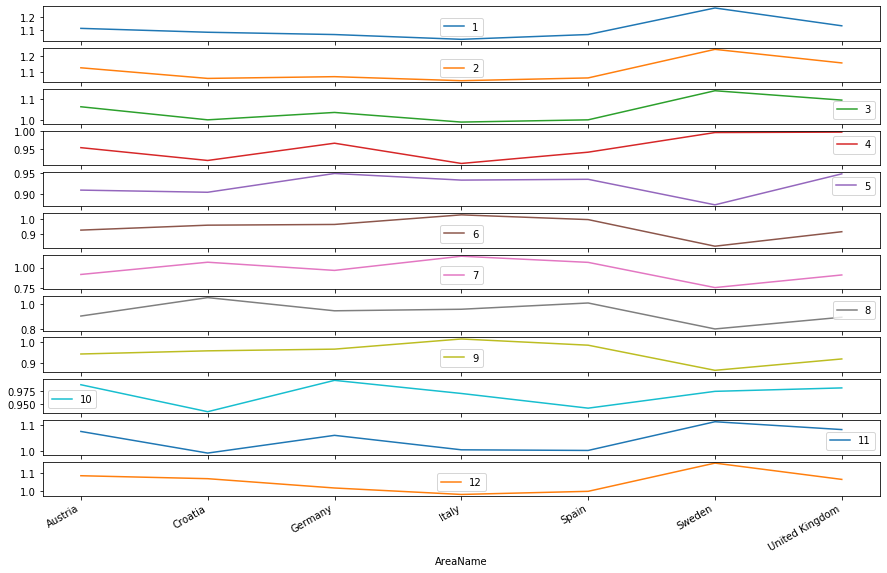

In [21]:
result.unstack(level=0).plot(kind='line',subplots=True, figsize=(15, 10))

Climatic conditions seem to make the difference (in Sweden the powerconsumption varies more over the year, a lot more power is consumed in winter time compared to July in summer -maybe also because of big differences in daylight)

In [ ]:
#again additional approach - here with other graphics

In [22]:
power_demand_relevant_countrys_monthly_mean = power_demand_relevant_countrys_time_period.groupby([power_demand_relevant_countrys_time_period.index.month, power_demand_relevant_countrys_time_period.AreaName]).mean()
power_demand_relevant_countrys_mean_total = power_demand_relevant_countrys.groupby([power_demand_relevant_countrys.AreaName]).mean()
proportions_monthly_to_total = power_demand_relevant_countrys_monthly_mean['TotalLoadValue']/power_demand_relevant_countrys_mean_total['TotalLoadValue']
result = proportions_monthly_to_total.unstack(level=0)

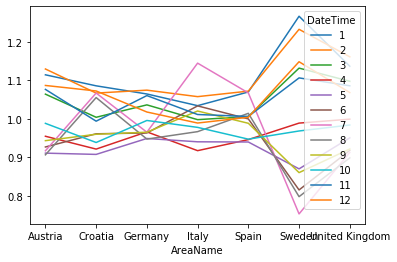

In [23]:
result_0 = result.plot()
result_0

#pro Aschnitt auf der Längsachse ist ein anderer Staat mit seinen 12 Monaten

In [24]:
result_1 = proportions_monthly_to_total.unstack(level= -1)
result_1

AreaName,Austria,Croatia,Germany,Italy,Spain,Sweden,United Kingdom
DateTime,,,,,,,
1,1.114511,1.085865,1.064680,1.034313,1.069919,1.266700,1.136892
2,1.129640,1.066994,1.074637,1.057775,1.072097,1.232713,1.161240
3,1.064255,1.004125,1.036387,0.997954,1.006085,1.131901,1.097731
4,0.954842,0.921479,0.966228,0.917381,0.946106,0.989008,0.999288
5,0.910961,0.907673,0.949074,0.940408,0.939901,0.870079,0.950712
6,0.926980,0.961241,0.963325,1.033745,0.999904,0.815315,0.918102
7,0.917108,1.067149,0.965359,1.144828,1.067482,0.753013,0.912753
8,0.906569,1.055318,0.947466,0.966806,1.014388,0.797897,0.898621
9,0.943375,0.960058,0.965349,1.020399,0.988544,0.860343,0.921774


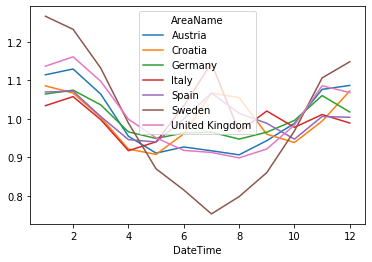

In [25]:
result_1.plot()

#jede Linie auf der Längsachse repräsentiert einen Staat über das Jahr hinweg

# Exercise 3 - calculate the hourly average consumption as deviation from mean consumption

Do the same as in exercise 2, but now for the hourly average consumption. I.e. how much is consumed on each of the 24 hours of a day?

Which country has the lowest, which the highest variability? What may be the reason for it?

In [26]:
pd_hour_mean = powerd.groupby([powerd.index.hour,powerd.AreaName]).mean()
pd_hour_mean['TotalLoadValue']

DateTime  AreaName      
0         Austria            5655.575192
          Croatia            1500.185104
          Germany           44154.977134
          Italy             24837.571194
          Spain             23931.919496
                                ...     
23        Germany           45549.716058
          Italy             26147.164841
          Spain             25330.783680
          Sweden            13504.059243
          United Kingdom    29568.920814
Name: TotalLoadValue, Length: 168, dtype: float64

In [27]:
pd_hour_mean_total = powerd.groupby([powerd.AreaName]).mean()
pd_hour_mean_total['TotalLoadValue']

AreaName
Austria            7124.438760
Croatia            2003.858225
Germany           55859.257807
Italy             33192.450073
Spain             28664.970677
Sweden            15623.217001
United Kingdom    36318.162173
Name: TotalLoadValue, dtype: float64

In [28]:
resulth = pd_hour_mean['TotalLoadValue']/pd_hour_mean_total['TotalLoadValue']
resulth.unstack(0)

DateTime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
AreaName,,,,,,,,,,,,,,,,,,,,,
Austria,0.793827,0.775329,0.774633,0.817662,0.913076,1.019787,1.094249,1.121196,1.136013,1.147562,...,1.076494,1.092211,1.115074,1.103892,1.062391,1.004171,0.956321,0.910790,0.860192,0.818254
Croatia,0.748648,0.725618,0.724223,0.743837,0.829584,0.953389,1.037373,1.091075,1.110589,1.127611,...,1.036893,1.057351,1.107197,1.154004,1.183393,1.157049,1.119188,1.015268,0.890710,0.799605
Germany,0.790468,0.784410,0.794828,0.827432,0.902923,0.992040,1.061572,1.097770,1.123069,1.145620,...,1.072070,1.074335,1.094322,1.100261,1.074262,1.024465,0.974616,0.918713,0.858213,0.815437
Italy,0.748290,0.728793,0.725584,0.742420,0.806415,0.926393,1.050223,1.125443,1.150836,1.150619,...,1.113087,1.120169,1.143845,1.170697,1.168466,1.116215,1.029558,0.936939,0.852839,0.787744
Spain,0.834884,0.806625,0.793747,0.795573,0.829511,0.895913,0.975686,1.039481,1.084153,1.110194,...,1.062025,1.053195,1.049548,1.069580,1.103386,1.126225,1.089923,1.016394,0.946177,0.883684
Sweden,0.854127,0.849989,0.850800,0.868920,0.928000,1.010035,1.064473,1.081965,1.090564,1.090868,...,1.060505,1.075009,1.083418,1.076015,1.056424,1.023223,0.979543,0.929498,0.886536,0.864358
United Kingdom,0.774774,0.750836,0.722387,0.706412,0.710490,0.791802,0.929793,1.043434,1.100562,1.128744,...,1.114911,1.132936,1.175015,1.195277,1.185801,1.151289,1.095735,1.011592,0.908020,0.814163


In [29]:
resulth.unstack(0).idxmax(axis=0)

DateTime
0             Sweden
1             Sweden
2             Sweden
3             Sweden
4             Sweden
5            Austria
6            Austria
7              Italy
8              Italy
9              Italy
10           Germany
11    United Kingdom
12    United Kingdom
13    United Kingdom
14    United Kingdom
15    United Kingdom
16    United Kingdom
17    United Kingdom
18    United Kingdom
19           Croatia
20           Croatia
21             Spain
22             Spain
23             Spain
dtype: object

In [30]:
resulth.unstack(0).idxmin(axis=0)

DateTime
0              Italy
1            Croatia
2     United Kingdom
3     United Kingdom
4     United Kingdom
5     United Kingdom
6     United Kingdom
7              Spain
8              Spain
9             Sweden
10            Sweden
11            Sweden
12            Sweden
13           Croatia
14           Croatia
15             Spain
16             Spain
17             Spain
18            Sweden
19           Austria
20           Austria
21           Austria
22             Italy
23             Italy
dtype: object

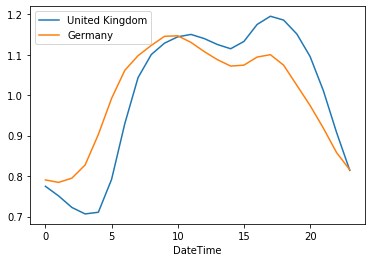

In [31]:
resulth.unstack(level=0).loc[('United Kingdom')].plot(legend=True)
resulth.unstack(level=0).loc[('Germany')].plot(legend=True)
#resulth.unstack(level=0).loc[('Spain')].plot(legend=True)
#resulth.unstack(level=0).loc[('Croatia')].plot(legend=True)
#resulth.unstack(level=0).loc[('Austria')].plot(legend=True)
#resulth.unstack(level=0).loc[('Sweden')].plot(legend=True)

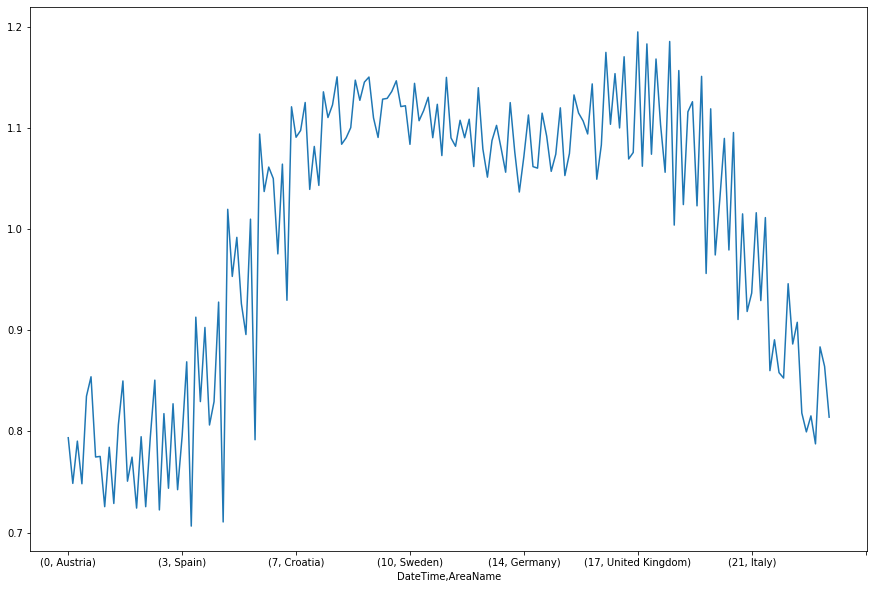

In [32]:
resulth.plot(figsize=(15, 10))

In [ ]:
# additions

In [33]:
power_demand_relevant_countrys_hourly_mean = power_demand_relevant_countrys_time_period.groupby([power_demand_relevant_countrys_time_period.index.hour, power_demand_relevant_countrys_time_period.AreaName]).mean()
power_demand_relevant_countrys_mean_total = power_demand_relevant_countrys.groupby([power_demand_relevant_countrys.AreaName]).mean()
proportions_hourly_to_total = power_demand_relevant_countrys_hourly_mean['TotalLoadValue']/power_demand_relevant_countrys_mean_total['TotalLoadValue']

In [34]:
results_hourly_1 = proportions_hourly_to_total.unstack(level= -1)
results_hourly_1

AreaName,Austria,Croatia,Germany,Italy,Spain,Sweden,United Kingdom
DateTime,,,,,,,
0,0.794602,0.750823,0.790562,0.753841,0.838955,0.848676,0.776906
1,0.776085,0.727726,0.784503,0.734200,0.810559,0.844563,0.752902
2,0.775388,0.726327,0.794923,0.730967,0.797617,0.845369,0.724375
3,0.818459,0.745998,0.827530,0.747927,0.799452,0.863374,0.708356
4,0.913966,0.831994,0.903030,0.812397,0.833556,0.922077,0.712445
5,1.020782,0.956159,0.992157,0.933265,0.900282,1.003588,0.793981
6,1.095316,1.040387,1.061698,1.058014,0.980444,1.057679,0.932351
7,1.122289,1.094245,1.097899,1.133792,1.044550,1.075059,1.046305
8,1.137121,1.113816,1.123202,1.159373,1.089440,1.083603,1.103590


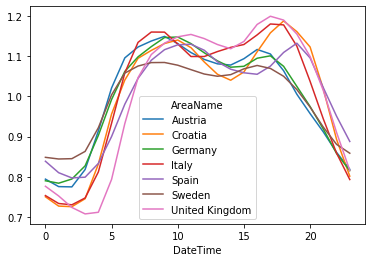

In [35]:
results_hourly_1.plot()

In [ ]:
# Sweden has, based on this graphic, the lowest variability, the United Kingdom the highest.
# Maybe in reality the hourly consumption in Sweden has the highest variability, but levels itself to highly mean, over the whole year.

# Exercise 4 - Calculate the average load per capita

Below you find a table with population data for our selected countries. You should use it to calculate per capita consumption.

(1) Calculate the average load in all countries using ```groupby``` and ```mean``` and select the column ```TotalLoadValue``` from the result.

(2) Divide the result by the ```Population``` column of the dataframe ```population```. Observe, how broadcasting helps here nicely.

(3) Plot the result. Which country has the highest load, which the lowest? What may be the reason? In which unit is this value? How could we convert it to MWh per year?

In [36]:
population = pd.DataFrame({'Country': ["Austria", "Croatia", "Germany", "Italy", "Spain", "Sweden", "United Kingdom"],
             'Population': [8840521, 4087843, 82905782, 60421760, 46796540, 10175214, 66460344]})

population.index = population["Country"]

population

,Country,Population
Country,,
Austria,Austria,8840521
Croatia,Croatia,4087843
Germany,Germany,82905782
Italy,Italy,60421760
Spain,Spain,46796540
Sweden,Sweden,10175214
United Kingdom,United Kingdom,66460344


In [37]:
pd_mean_total = powerd.groupby([powerd.AreaName]).mean()
pd_mean_total['TotalLoadValue']

AreaName
Austria            7124.438760
Croatia            2003.858225
Germany           55859.257807
Italy             33192.450073
Spain             28664.970677
Sweden            15623.217001
United Kingdom    36318.162173
Name: TotalLoadValue, dtype: float64

In [38]:
MWh = pd_mean_total['TotalLoadValue']/5                          #5 years ,M=1000?

In [39]:
MWh

AreaName
Austria            1424.887752
Croatia             400.771645
Germany           11171.851561
Italy              6638.490015
Spain              5732.994135
Sweden             3124.643400
United Kingdom     7263.632435
Name: TotalLoadValue, dtype: float64

In [40]:
MWh/population['Population']

AreaName
Austria           0.000161
Croatia           0.000098
Germany           0.000135
Italy             0.000110
Spain             0.000123
Sweden            0.000307
United Kingdom    0.000109
dtype: float64

In [ ]:
# addition

In [41]:
powde_country_chart = power_demand_relevant_countrys_mean_total ["TotalLoadValue"] / population["Population"]
powde_country_chart

AreaName
Austria           0.000805
Croatia           0.000489
Germany           0.000674
Italy             0.000545
Spain             0.000610
Sweden            0.001545
United Kingdom    0.000545
dtype: float64

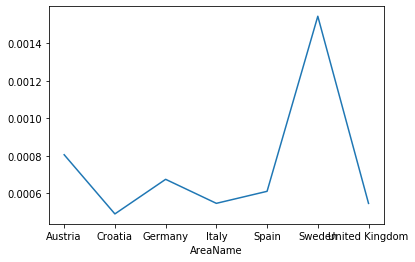

In [42]:
powde_country_chart.plot()